In [73]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
import numpy as np

In [74]:
def build_oracle(qc, gates):
    """
    Append gates to the given quantum circuit.
    """
    for gate_name, args in gates:
        gate = getattr(qc, gate_name)
        gate(*args)


In [75]:
def phase_oracle(n, gates_to_apply, name="oracle"):
    qc = QuantumCircuit(n, name=name)
    build_oracle(qc, gates_to_apply)
    return qc

In [76]:
def diffuser(n, gates_to_apply, name="diffuser"):
    qc = QuantumCircuit(n, name=name)

    for qb in range(n - 2):
        qc.h(qb)
    for i in range(n - 2):
        qc.x(i)

    build_oracle(qc, gates_to_apply)

    for i in range(n - 2):
        qc.x(i)
    for qb in range(n - 2):
        qc.h(qb)
    return qc

In [112]:
def grover_algorithm(grover_bits, gates_steps):
    # In the given example, there are three qubit programs,
    # the fourth qubit is the zero qubit reference and fifth one 
    # is to insert the ancilla qubit minus state
    n = grover_bits
    gr = QuantumCircuit(n, n - 2)

    # Number of solutions
    #mu = solutions
    #iterations = int(np.floor(np.pi / 4 * np.sqrt(2 ** (n - 2)) / mu))

    iterations = int(np.pi/4 * np.sqrt(2**(n - 2)))

    print(f'Oracle and diffuser applied {iterations} time(s)')

    # Step 1: apply Hadamard gates on all working qubits
    gr.h(range(n - 2)) 

    # Put ancilla in minus state |->
    gr.x(n - 1)
    gr.h(n - 1)

    # Step 2: apply r rounds of the phase oracle and the diffuser
    for r in range(iterations):
        gr.append(phase_oracle(n, gates_steps), range(n))
        gr.append(diffuser(n, gates_steps), range(n))

    gr.measure(range(n - 2), range(n - 2))

    return gr


In [113]:
def transpile_circuit(grover_circuit):
    
    display(grover_circuit.draw(output='mpl'))
    
    simulator = AerSimulator()
    transpiled_qc = transpile(grover_circuit, simulator)
    job = simulator.run(transpiled_qc, shots=1000)  # Aumentamos el número de shots
    result = job.result()
    counts = result.get_counts()
    
    print("Counts:", counts)
    display(plot_histogram(counts))

Oracle and diffuser applied 2 time(s)


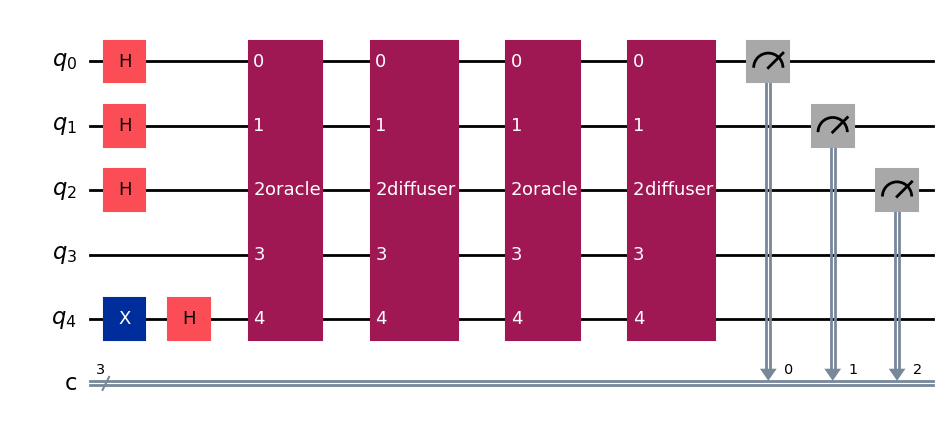

Counts: {'100': 5, '101': 7, '000': 7, '010': 5, '001': 11, '110': 5, '011': 7, '111': 953}


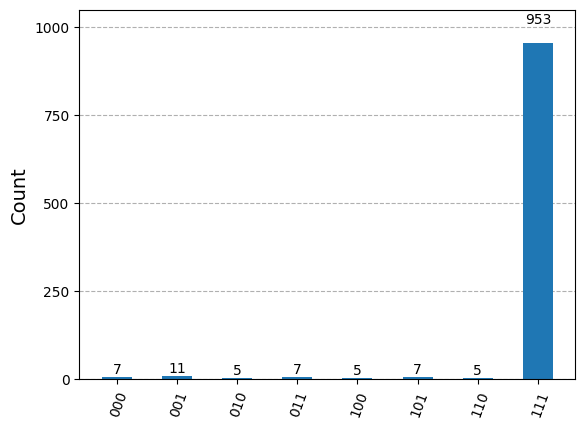

In [114]:
gates_to_apply = [
    ("h", [2]),
    ("ccx", [0, 1, 2]),
    ("h", [2]),
]

ORACLE_BITS = 3
GROVER_BITS = ORACLE_BITS + 2
oracle = QuantumCircuit(GROVER_BITS)
build_oracle(oracle, gates_to_apply)

gr = grover_algorithm(GROVER_BITS, gates_to_apply)

transpile_circuit(gr)

Oracle and diffuser applied 1 time(s)


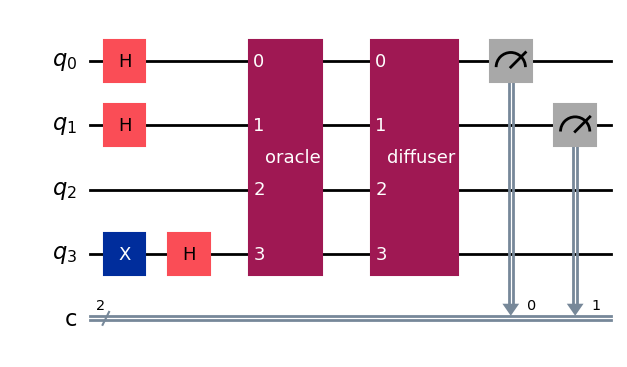

Counts: {'01': 1000}


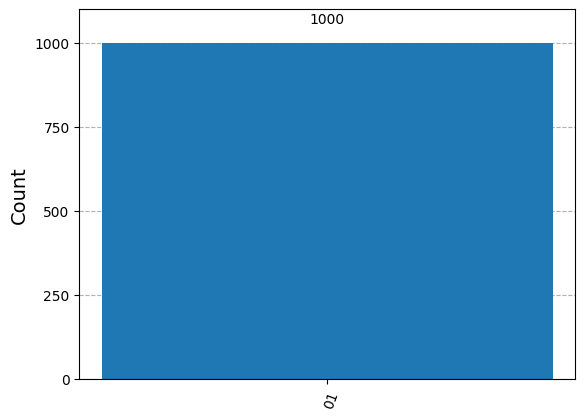

In [115]:
gates_to_apply = [
    ("ry", [np.pi/2, 1]),
    ("cx", [0, 1]),
    ("ry", [-np.pi/2, 1]),
    ("cx", [0, 1]),
]

ORACLE_BITS = 2
GROVER_BITS = ORACLE_BITS + 2
oracle = QuantumCircuit(GROVER_BITS)
build_oracle(oracle, gates_to_apply)

gr = grover_algorithm(GROVER_BITS, gates_to_apply)

transpile_circuit(gr)